Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

In [2]:
df = pd.read_csv(r'C:\Users\Hp\Downloads\loan-train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### ID COLUMN IF NO USED

In [5]:
df.drop('Loan_ID',axis=1,inplace=True)

In [7]:
df.dropna(inplace=True)

#### CONVERTING STRING TO NUMERIC AND REPLACING

In [9]:
df['Dependents'] = df['Dependents'].replace('3+','3')

In [11]:
df['Dependents'] = pd.to_numeric(df['Dependents'],errors='coerce').astype(int)

In [13]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### MANUAL ENCODING

In [14]:
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})

In [15]:
df['Married'] = df['Married'].replace({'Yes':1,'No':0})

In [17]:
df['Education'] = df['Education'].replace({'Graduate':1,'Not Graduate':0})

In [20]:
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1,'No':0})

In [22]:
df['Property_Area'] = pd.factorize(df['Property_Area']) [0] + 1

In [25]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1,'N':0})

In [27]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [28]:
df['LoanAmount'] = pd.to_numeric(df['LoanAmount'],errors='coerce').astype(int)

In [29]:
df['Credit_History'] = pd.to_numeric(df['Credit_History'],errors='coerce').astype(int)

In [30]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128,360.0,1,1,0
2,1,1,0,1,1,3000,0.0,66,360.0,1,2,1
3,1,1,0,0,0,2583,2358.0,120,360.0,1,2,1
4,1,0,0,1,0,6000,0.0,141,360.0,1,2,1
5,1,1,2,1,1,5417,4196.0,267,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71,360.0,1,1,1
610,1,1,3,1,0,4106,0.0,40,180.0,1,1,1
611,1,1,1,1,0,8072,240.0,253,360.0,1,2,1
612,1,1,2,1,0,7583,0.0,187,360.0,1,2,1


#### MULTIPLYING LAON AMOUNT BY 1000 TO BE A REAL NUMBER 

In [31]:
df['LoanAmount'] = df['LoanAmount']*1000

In [32]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128000,360.0,1,1,0
2,1,1,0,1,1,3000,0.0,66000,360.0,1,2,1
3,1,1,0,0,0,2583,2358.0,120000,360.0,1,2,1
4,1,0,0,1,0,6000,0.0,141000,360.0,1,2,1
5,1,1,2,1,1,5417,4196.0,267000,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71000,360.0,1,1,1
610,1,1,3,1,0,4106,0.0,40000,180.0,1,1,1
611,1,1,1,1,0,8072,240.0,253000,360.0,1,2,1
612,1,1,2,1,0,7583,0.0,187000,360.0,1,2,1


#### FINDING OUT THE BEST FEATURES AND REMOVING NON CORELATED FEATURES

In [33]:
corr = df.corr()

In [34]:
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.217510,-0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.097035,0.064504
Married,0.349424,1.000000,0.386367,-0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.028167,0.112321
Dependents,0.217510,0.386367,1.000000,-0.028608,0.045754,0.131139,-0.000318,0.172780,-0.096361,-0.026651,-0.030838,0.035428
Education,-0.059245,-0.001652,-0.028608,1.000000,0.005085,0.131172,0.074499,0.172780,0.102168,0.056656,0.060010,0.068437
Self_Employed,-0.002761,0.015674,0.045754,0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.037900,-0.034715
ApplicantIncome,0.032644,0.036717,0.131139,0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.024586,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.000318,0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.004348,-0.049020
LoanAmount,0.098975,0.183442,0.172780,0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.039807,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.096361,0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.000568,-0.007798
Credit_History,0.022447,0.029095,-0.026651,0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.040092,0.529390


<AxesSubplot:>

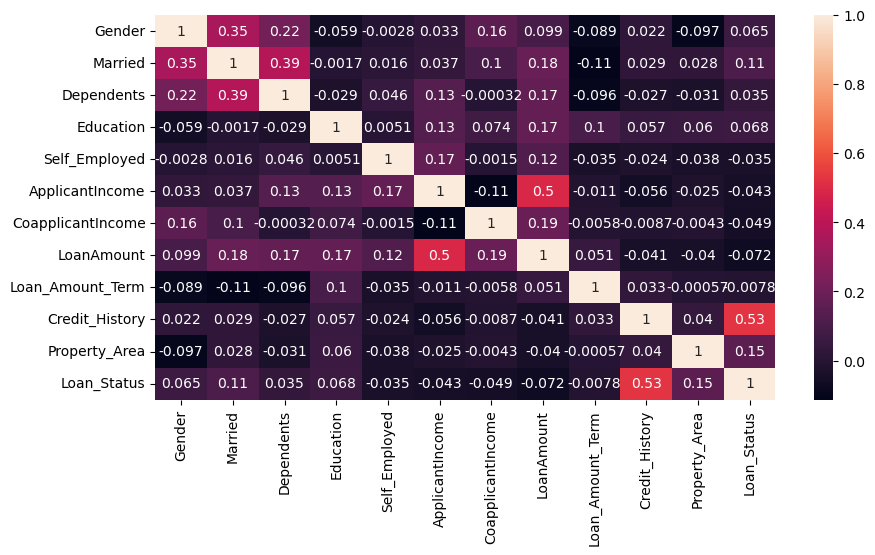

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True)

In [41]:
df.drop(['Self_Employed','CoapplicantIncome','Loan_Amount_Term'],axis=1,inplace=True)

In [42]:
df

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,4583,128000,1,1,0
2,1,1,0,1,3000,66000,1,2,1
3,1,1,0,0,2583,120000,1,2,1
4,1,0,0,1,6000,141000,1,2,1
5,1,1,2,1,5417,267000,1,2,1
...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,2900,71000,1,1,1
610,1,1,3,1,4106,40000,1,1,1
611,1,1,1,1,8072,253000,1,2,1
612,1,1,2,1,7583,187000,1,2,1


#### SCALING LOAN AND APPLICANT INCOME

In [43]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [44]:
df[['ApplicantIncome','LoanAmount']] = ss.fit_transform(df[['ApplicantIncome','LoanAmount']])

In [45]:
df

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,-0.137970,-0.208089,1,1,0
2,1,1,0,1,-0.417536,-0.979001,1,2,1
3,1,1,0,0,-0.491180,-0.307562,1,2,1
4,1,0,0,1,0.112280,-0.046446,1,2,1
5,1,1,2,1,0.009319,1.520245,1,2,1
...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,-0.435196,-0.916831,1,1,1
610,1,1,3,1,-0.222210,-1.302286,1,1,1
611,1,1,1,1,0.478206,1.346168,1,2,1
612,1,1,2,1,0.391846,0.525520,1,2,1


<AxesSubplot:>

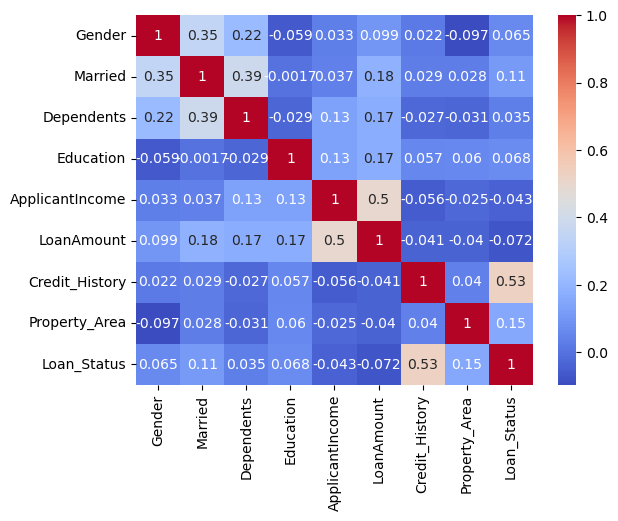

In [48]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

#### EACH COLUMN IMPACT ON LOAN STATUS 

<AxesSubplot:xlabel='Property_Area'>

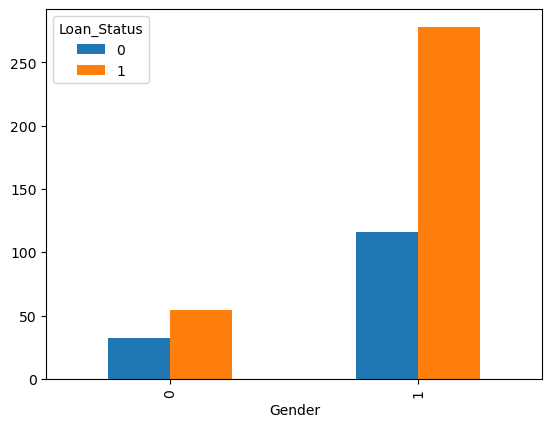

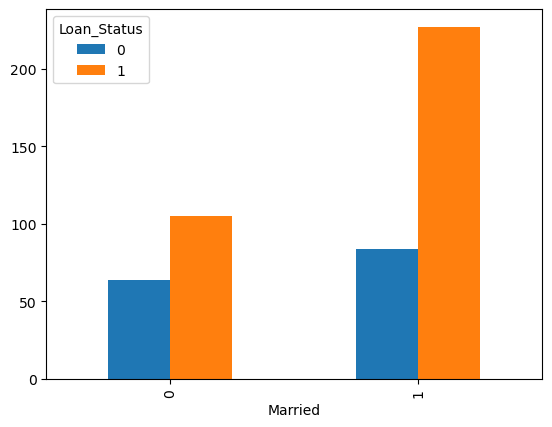

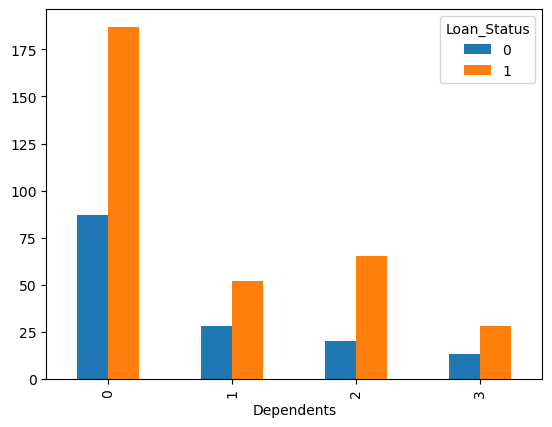

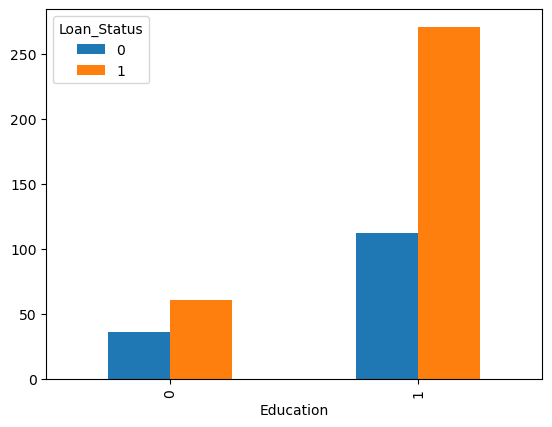

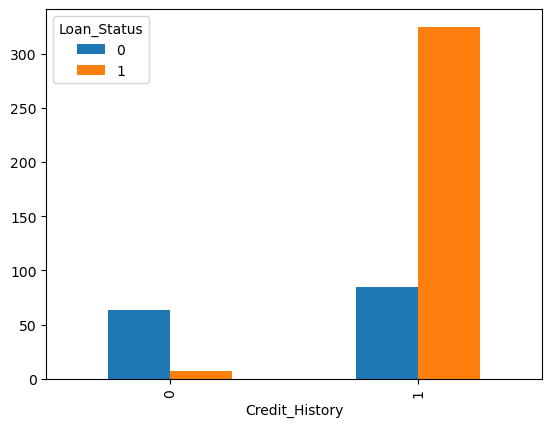

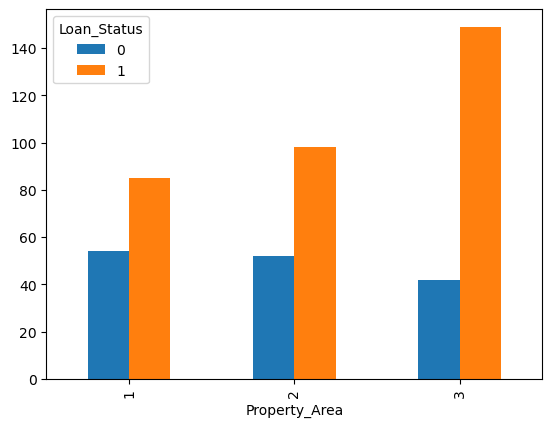

In [50]:
pd.crosstab(df['Gender'],df['Loan_Status']).plot(kind='bar')
pd.crosstab(df['Married'],df['Loan_Status']).plot(kind='bar')
pd.crosstab(df['Dependents'],df['Loan_Status']).plot(kind='bar')
pd.crosstab(df['Education'],df['Loan_Status']).plot(kind='bar')
pd.crosstab(df['Credit_History'],df['Loan_Status']).plot(kind='bar')
pd.crosstab(df['Property_Area'],df['Loan_Status']).plot(kind='bar')

In [51]:
df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

#### IMBALANCE HANDLING

In [54]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 226.0/226.0 kB 7.0 MB/s eta 0:00:00
     ------------------------------------- 302.0/302.0 kB 18.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [55]:
import imblearn

In [56]:
from imblearn.over_sampling import SMOTE

In [58]:
X = df.drop(["Loan_Status"], axis=1)
y = df['Loan_Status']

smote = SMOTE(random_state=42)

Xr, yr = smote.fit_resample(X, y)

<AxesSubplot:xlabel='Property_Area'>

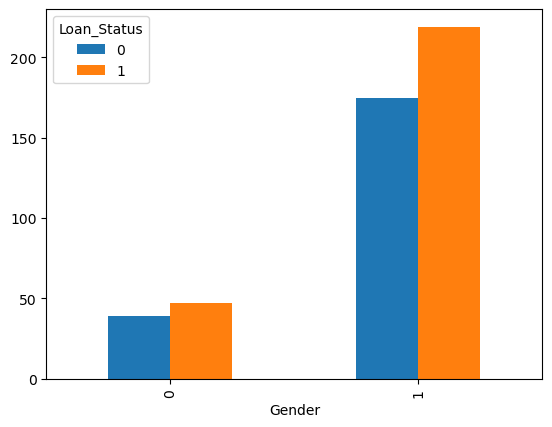

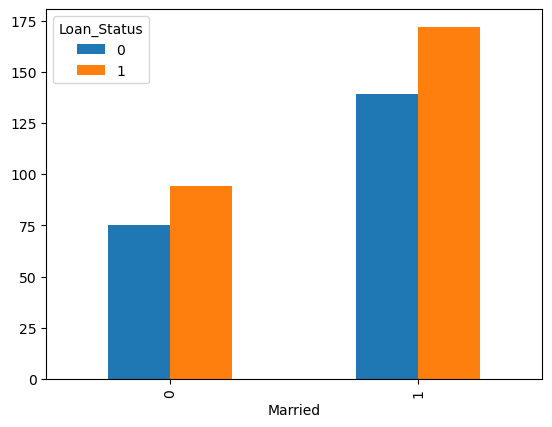

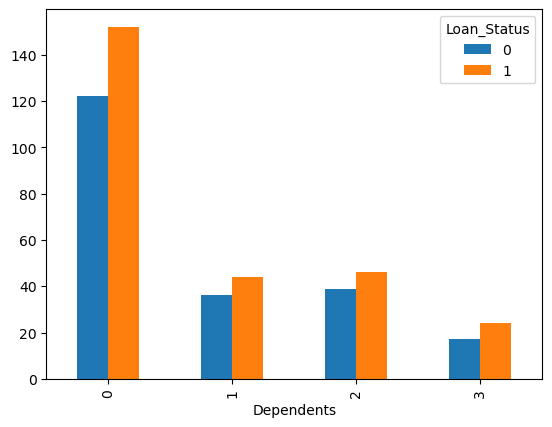

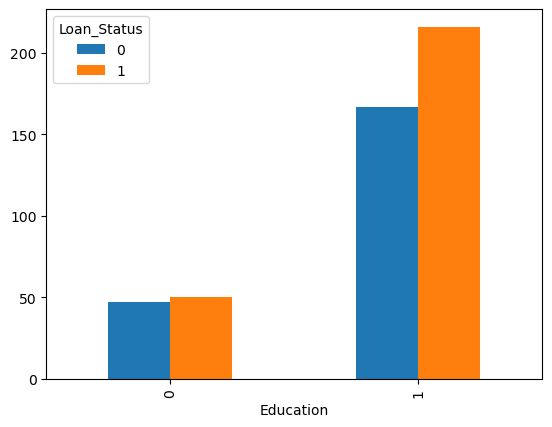

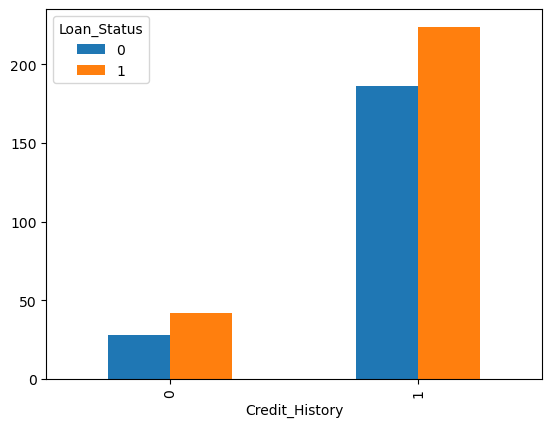

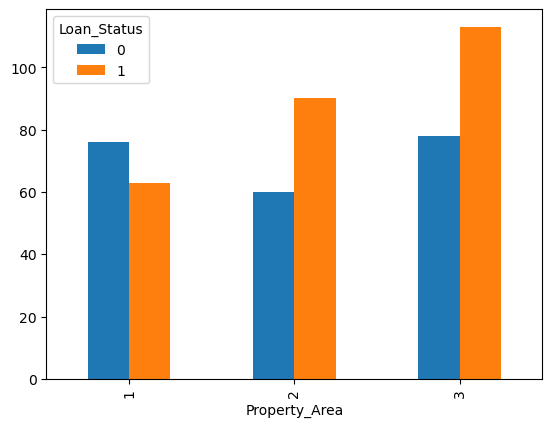

In [59]:
pd.crosstab(df['Gender'],yr).plot(kind='bar')
pd.crosstab(df['Married'],yr).plot(kind='bar')
pd.crosstab(df['Dependents'],yr).plot(kind='bar')
pd.crosstab(df['Education'],yr).plot(kind='bar')
pd.crosstab(df['Credit_History'],yr).plot(kind='bar')
pd.crosstab(df['Property_Area'],yr).plot(kind='bar')

In [60]:
Xr.head()

,Gender,Married,Dependents,Education,ApplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,1,1,1,-0.137970,-0.208089,1,1
1,1,1,0,1,-0.417536,-0.979001,1,2
2,1,1,0,0,-0.491180,-0.307562,1,2
3,1,0,0,1,0.112280,-0.046446,1,2
4,1,1,2,1,0.009319,1.520245,1,2


#### SPLIT THE DATA

In [61]:
X_train,X_test,y_train,y_test = train_test_split(Xr,yr,test_size=0.30,random_state=1)

In [64]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()

In [65]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print('Accuracy Score :',accuracy_score(y_test,y_pred))
    
    train = model.score(X_train,y_train)
    test = model.score(X_test,y_test)
    
    print('Training Performance',train)
    print('Testing Performnace',test)
    
    return model

#### LOGISTIC REGRESSION

In [66]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.74      0.64      0.69        97
           1       0.70      0.79      0.74       103

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200

Accuracy Score : 0.715
Training Performance 0.7564655172413793
Testing Performnace 0.715


LogisticRegression()

#### KNN

In [67]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        97
           1       0.75      0.66      0.70       103

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200

Accuracy Score : 0.71
Training Performance 0.8232758620689655
Testing Performnace 0.71


KNeighborsClassifier()

#### DECISION TREE

In [68]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        97
           1       0.78      0.74      0.76       103

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.76      0.76      0.76       200

Accuracy Score : 0.755
Training Performance 1.0
Testing Performnace 0.755


DecisionTreeClassifier()

#### SVM

In [69]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.80      0.59      0.68        97
           1       0.69      0.86      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.74      0.73      0.72       200

Accuracy Score : 0.73
Training Performance 0.7780172413793104
Testing Performnace 0.73


SVC()

#### XGBOOST

In [70]:
pip install Xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [71]:
from xgboost import XGBClassifier

In [72]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score ',accuracy_score(y_test,y_pred))

train = xg.score(X_train,y_train)
test = xg.score(X_test,y_test)
    
print('Training Performance',train)
print('Testing Performnace',test)

              precision    recall  f1-score   support

           0       0.77      0.76      0.77        97
           1       0.78      0.79      0.78       103

    accuracy                           0.78       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.78      0.77       200

Accuracy Score  0.775
Training Performance 1.0
Testing Performnace 0.775


#### RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
print('Accuracy Score : ',accuracy_score(y_test,y_pred))

train = rf.score(X_train,y_train)
test = rf.score(X_test,y_test)
    
print('Training Performance',train)
print('Testing Performnace',test)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        97
           1       0.79      0.77      0.78       103

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.78      0.78       200

Accuracy Score :  0.775
Training Performance 1.0
Testing Performnace 0.775
